In [1]:
import pandas_datareader as pdr

df=pdr.get_data_tiingo('AAPL',api_key='2e28eec33283e8896877b567992c9a3f6ebfb85f')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10700\1162544080.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key='2e28eec33283e8896877b567992c9a3f6ebfb85f')


In [2]:
df.to_csv('AAPL.csv')

In [3]:
import pandas as pd

df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-03 00:00:00+00:00,172.23,174.55,171.96,172.53,28819653,40.889783,41.440583,40.825681,40.961007,115278612,0.0,1.0
1,AAPL,2018-01-04 00:00:00+00:00,173.03,173.47,172.08,172.54,22211345,41.079714,41.184176,40.854171,40.963381,88845380,0.0,1.0
2,AAPL,2018-01-05 00:00:00+00:00,175.00,175.37,173.05,173.44,23016177,41.547419,41.635262,41.084462,41.177054,92064708,0.0,1.0
3,AAPL,2018-01-08 00:00:00+00:00,174.35,175.61,173.93,174.35,20134092,41.393100,41.692242,41.293386,41.393100,80536368,0.0,1.0
4,AAPL,2018-01-09 00:00:00+00:00,174.33,175.06,173.41,174.55,21262614,41.388352,41.561664,41.169931,41.440583,85050456,0.0,1.0


In [5]:
df1=df.reset_index()['close']

In [6]:
df1.shape

(1258,)

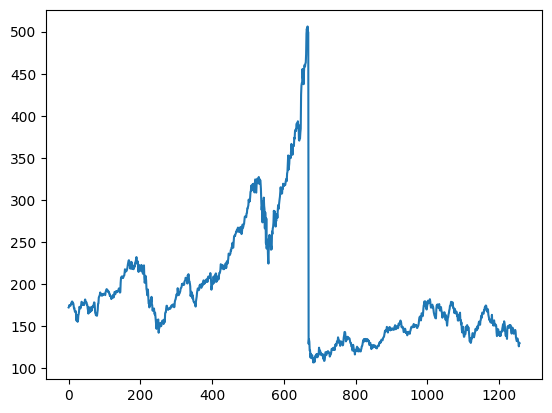

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
train_size=int(len(df1)*0.80)
test_size=len(df1)-train_size
train_set,test_set=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [10]:
# convert array into dataset matrix

def create_Dataset(dataset,time_step=1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[(i+time_step),0])
    return np.array(dataX),np.array(dataY)    

In [11]:
time_step =100
x_train,y_train=create_Dataset(train_set,time_step)
x_test,y_test=create_Dataset(test_set,time_step)


In [12]:
y_train

array([2.03030683e-01, 2.02028804e-01, 2.00450845e-01, 2.08891672e-01,
       2.12874139e-01, 2.16581090e-01, 2.18259236e-01, 2.16956794e-01,
       2.12548528e-01, 2.11371321e-01, 2.14001252e-01, 2.10043832e-01,
       2.10294302e-01, 2.05385097e-01, 2.05134627e-01, 1.97495304e-01,
       1.99524108e-01, 1.96919224e-01, 1.95566688e-01, 1.88678773e-01,
       1.94339386e-01, 1.93663118e-01, 1.97019411e-01, 1.96042580e-01,
       2.01227301e-01, 1.93061991e-01, 1.96768942e-01, 2.03206011e-01,
       2.09743269e-01, 2.09167188e-01, 2.02980589e-01, 2.10870382e-01,
       2.11621791e-01, 2.10569818e-01, 2.11922354e-01, 2.09292423e-01,
       2.12999374e-01, 2.11897307e-01, 2.12323106e-01, 2.15804634e-01,
       2.20363181e-01, 2.18835316e-01, 2.10745147e-01, 2.08065122e-01,
       2.09016907e-01, 2.37094552e-01, 2.51847214e-01, 2.53350031e-01,
       2.56055103e-01, 2.51145899e-01, 2.51496556e-01, 2.55579211e-01,
       2.52197871e-01, 2.55554164e-01, 2.57758297e-01, 2.58985598e-01,
      

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [14]:
from keras.layers import LSTM,Dense
from keras.models import Sequential

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 13s 392ms/step - loss: 0.0302 - mean_absolute_error: 0.1219 - val_loss: 5.2434e-04 - val_mean_absolute_error: 0.0189
Epoch 2/100
15/15 [==============================] - 2s 165ms/step - loss: 0.0115 - mean_absolute_error: 0.0620 - val_loss: 5.1942e-04 - val_mean_absolute_error: 0.0182
Epoch 3/100
15/15 [==============================] - 3s 197ms/step - loss: 0.0086 - mean_absolute_error: 0.0426 - val_loss: 4.5963e-04 - val_mean_absolute_error: 0.0177
Epoch 4/100
15/15 [==============================] - 4s 278ms/step - loss: 0.0075 - mean_absolute_error: 0.0424 - val_loss: 3.4774e-04 - val_mean_absolute_error: 0.0159
Epoch 5/100
15/15 [==============================] - 3s 183ms/step - loss: 0.0076 - mean_absolute_error: 0.0513 - val_loss: 0.0019 - val_mean_absolute_error: 0.0391
Epoch 6/100
15/15 [==============================] - 3s 186ms/step - loss: 0.0060 - mean_absolute_error: 0.0361 - val_loss: 3.7811e-04 - val_mean_absolute_err

In [18]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

5/5 [==============================] - 0s 35ms/step


In [19]:
##Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [20]:
y_test=sc.inverse_transform(np.array(y_test).reshape(-1,1))
y_train=sc.inverse_transform(np.array(y_train).reshape(-1,1))

In [21]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

13.011247478192496

In [22]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

7.1269805595357685

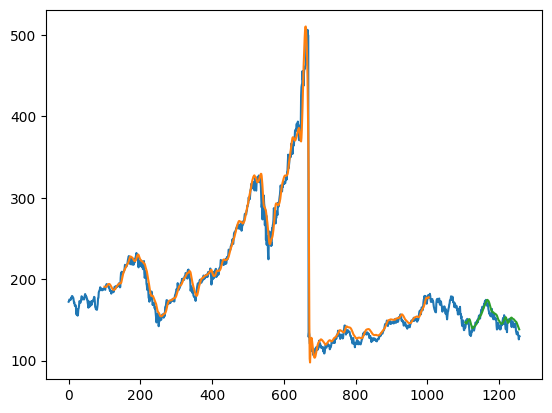

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [23]:
len(test_set)

252

In [25]:
x_input=test_set[152:].reshape(1,-1)
x_input.shape



(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07416581]
101
1 day input [0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666
 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897
 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834
 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317
 0.08846587 0.09430182 0.09675642 

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [29]:
import matplotlib.pyplot as plt

In [30]:
len(df1)

1258

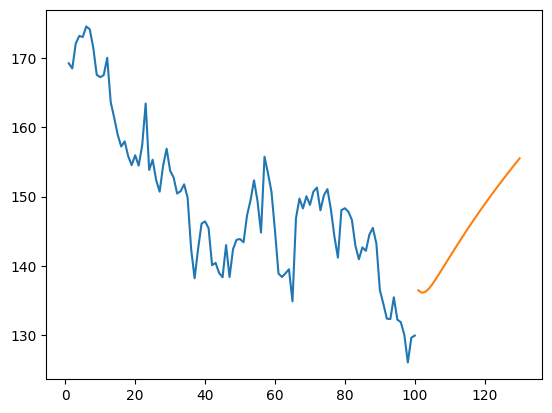

In [31]:
plt.plot(day_new,sc.inverse_transform(df1[1158:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

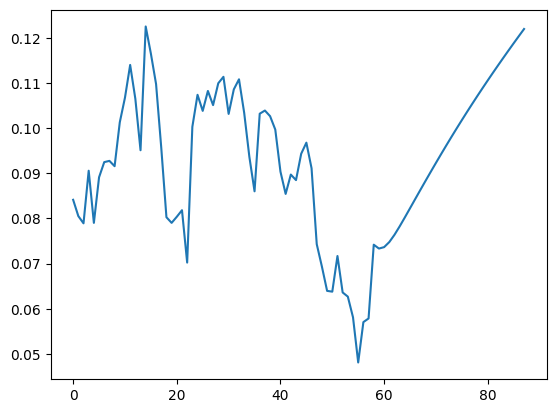

In [33]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])